In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import sklearn.ensemble
from scipy import signal
from scipy.signal import argrelextrema
from dataread import *
from plots import *
from BollingerBand import *
from sklearn.metrics import confusion_matrix
import featuregeneration as fg
from fourier import FourierTransform
import RFFramework as rff
from sklearn.feature_selection import SelectKBest, chi2
from classifier import Classifier

# Data
TODO: What is the form of data, where does it come from, what do we do with it (standarize, normalize)

In [2]:
train_df = preprocess(get_train_df())
standarized_train_df = preprocess(get_train_df(), 'standarize')

In [3]:
train_df

,,1,2,3,4,5,6,7,8,9,10,...,3188,3189,3190,3191,3192,3193,3194,3195,3196,3197
ID,LABEL,,,,,,,,,,,,,,,,,,,,,
0,2,0.736523,0.730081,0.689200,0.658990,0.650918,0.596280,0.589561,0.614529,0.625039,0.573526,...,0.626207,0.610756,0.610756,0.692428,0.707468,0.735683,0.701533,0.715714,0.679562,0.650931
1,2,0.532753,0.540847,0.501242,0.530814,0.467952,0.478370,0.456348,0.458303,0.460483,0.477457,...,0.589813,0.543444,0.543444,0.555176,0.587280,0.596288,0.576317,0.605424,0.620715,0.627014
2,2,0.654833,0.656359,0.646036,0.638216,0.619388,0.623831,0.623133,0.633317,0.610135,0.632386,...,0.373689,0.413233,0.413233,0.393135,0.397327,0.409395,0.401551,0.393591,0.374466,0.362068
3,2,0.931470,0.964146,0.893628,0.887021,0.917724,0.909832,0.924910,0.907656,0.909394,0.926476,...,0.429184,0.414404,0.414404,0.467293,0.451605,0.400407,0.406513,0.393142,0.393080,0.442132
4,2,0.256688,0.254720,0.252393,0.261119,0.274858,0.283299,0.296523,0.287606,0.299731,0.306570,...,0.444330,0.514840,0.514840,0.531093,0.499437,0.501346,0.515554,0.521064,0.511134,0.475003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,0.192662,0.190720,0.216761,0.182729,0.236480,0.236040,0.222772,0.270841,0.304433,0.339326,...,0.617571,0.630967,0.648725,0.646325,0.647644,0.639196,0.316290,0.329943,0.367017,0.396430
5083,1,0.904041,0.861872,0.869355,0.845140,0.803833,0.744330,0.735784,0.677318,0.691825,0.645488,...,0.470030,0.479281,0.448762,0.465187,0.415651,0.423198,0.497589,0.524174,0.461856,0.496543
5084,1,0.457990,0.460240,0.452298,0.440223,0.461572,0.453846,0.447998,0.448955,0.440521,0.440965,...,0.311459,0.298246,0.300774,0.339675,0.332339,0.322856,0.356632,0.367707,0.363143,0.363319


In [4]:
test_df = preprocess(get_test_df(), 'normalize')
standarized_test_df = preprocess(get_test_df(), 'standarize')

# Some examples
TODO: write that it is a time series, measurements are flux, what is flux ...

There is an exoplanet


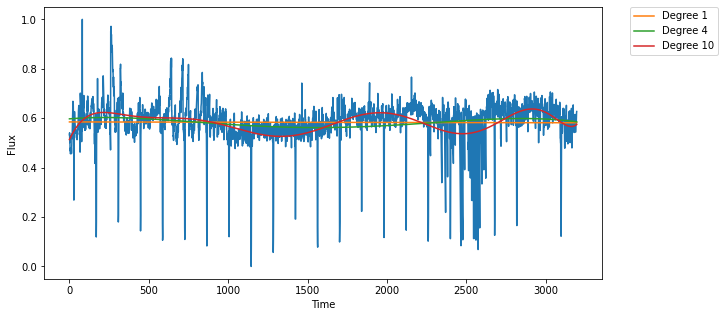

In [5]:
plot_row(train_df, 1)

There is an exoplanet


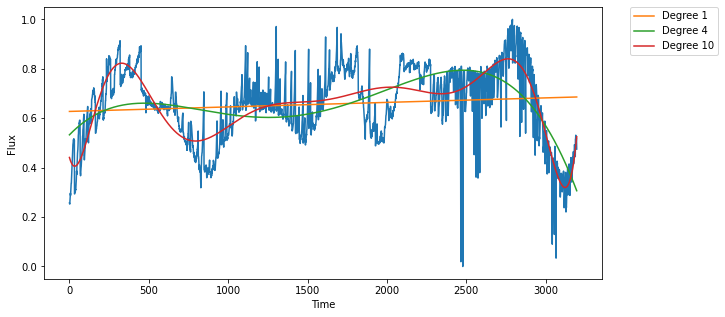

In [6]:
plot_row(train_df, 4)

There is an exoplanet


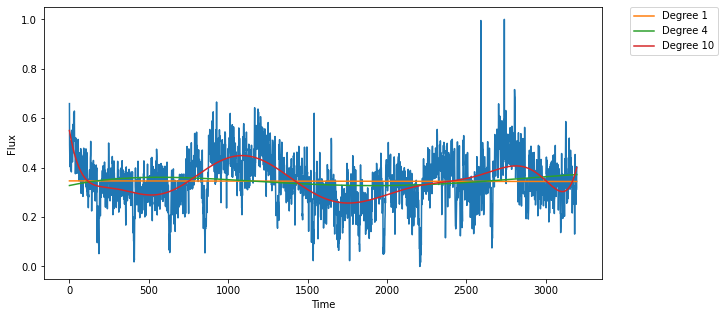

In [7]:
plot_row(train_df, 19)

There's no exoplanet


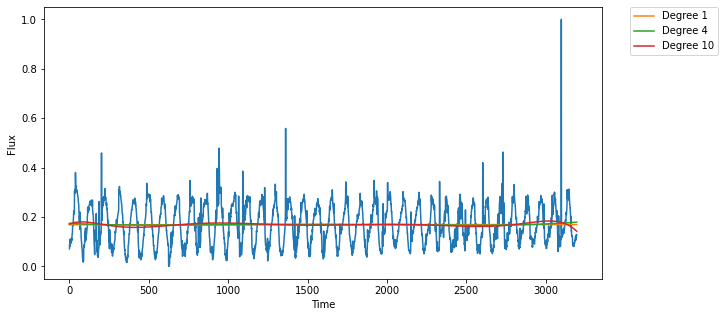

In [8]:
plot_row(train_df, 40)

There's no exoplanet


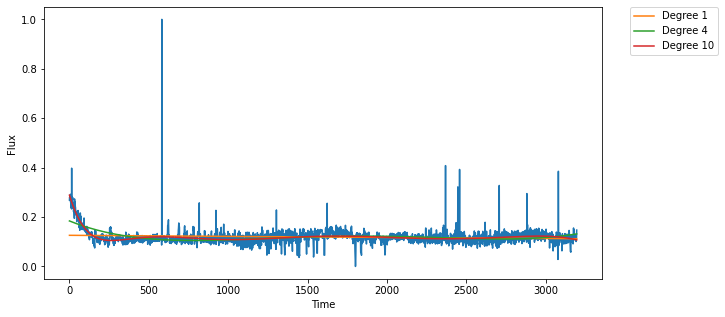

In [9]:
plot_row(train_df, 45)

# Features

In [10]:
train_features = fg.Features(train_df, standarized_train_df)
test_features = fg.Features(test_df, standarized_test_df)

In [11]:
train_features.features

,Label,Flux standard deviation,Flux variance,Flux mean,Flux BB Outliers,STD of Flux BBand outliers,Mean of Flux BBand outliers,Fourier: STD,Fourier: Mean,Fourier: BBand outliers
0,2,0.103135,0.010637,0.682690,6,97.019031,100.000000,32.051846,31.361299,0
1,2,0.096185,0.009252,0.583164,37,52.941145,39.346154,40.486935,33.543942,23
2,2,0.131133,0.017196,0.410850,22,90.781960,58.264151,30.307229,20.750008,3
3,2,0.161639,0.026127,0.412969,17,104.827293,70.658537,18.174195,13.065474,1
4,2,0.148961,0.022189,0.656592,24,148.005043,53.672727,18.445966,17.551577,1
...,...,...,...,...,...,...,...,...,...,...
5082,1,0.133107,0.017717,0.383980,4,182.696945,118.909091,35.556635,28.932504,0
5083,1,0.089216,0.007960,0.484953,4,140.552093,67.021739,39.151443,35.473390,0
5084,1,0.029956,0.000897,0.325984,4,112.767790,122.117647,29.747736,45.840732,0
5085,1,0.020258,0.000410,0.031780,0,246.321112,275.900000,18.286087,52.075197,0


## Discrete Fourier Transform

There is an exoplanet
std =  52.556554309862385


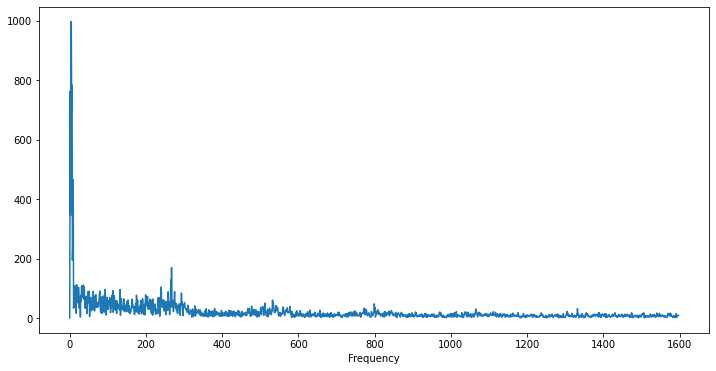

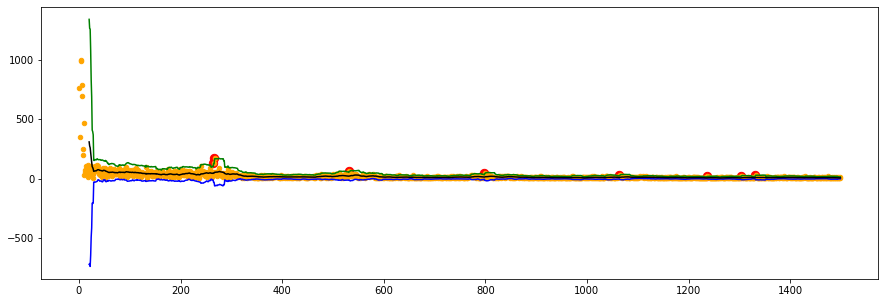

In [12]:
train_features.dft.plot_row(4)
plot_band(train_features.dft.fourier_df.iloc[4][1:1500])

There is no exoplanet
std =  35.548247654318736


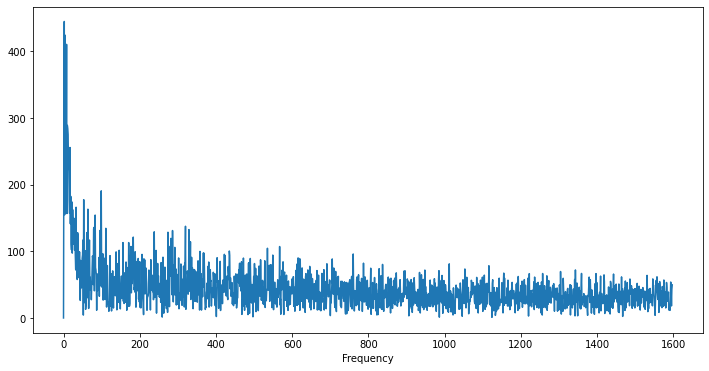

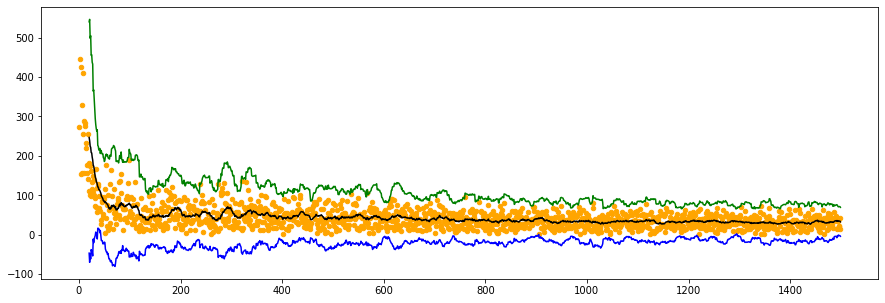

In [13]:
train_features.dft.plot_row(45)
plot_band(train_features.dft.fourier_df.iloc[45][1:1500])

## Outliers
TODO: Why we look for the outliers and do something with them

### Bollinger Band
TODO

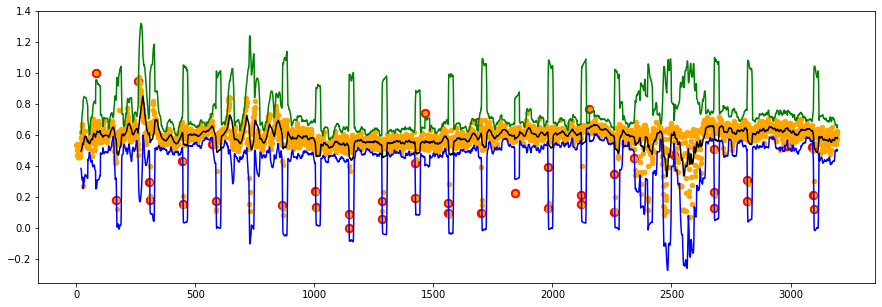

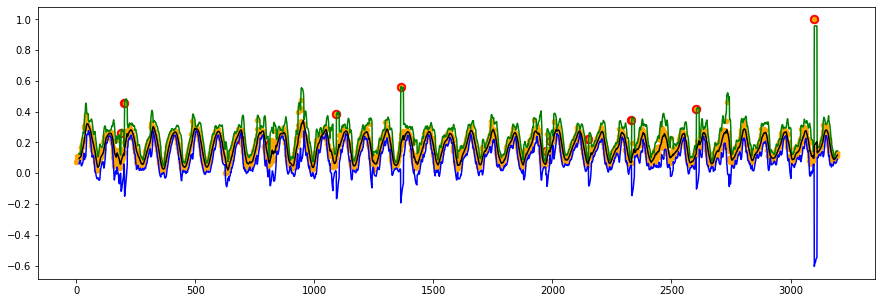

In [14]:
plot_band(train_df.iloc[1])
plot_band(train_df.iloc[40], span=12)

### Properties of outliers
TODO: why std and mean

### Earth moving distance
TODO

# AdaBoost

In [15]:
test = Classifier(sklearn.ensemble.AdaBoostClassifier, n_estimators = 1000)
test.fit_df(train_features.features)

In [16]:
test.predict_df(test_features.features)

array([1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Confusion matrix


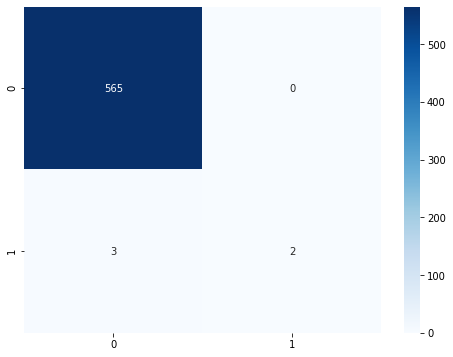

In [21]:
print("Confusion matrix")
test.plot_cfm()

## Calculating precision and recall
TODO: What is precision and recall and why we use them. What is f_score

In [18]:
test.calculate_f_score()[0]

0.5714285714285715

# Features ranking

In [ ]:
tu ma byc kodzik co trzeba go znalezc

Flux standard deviation


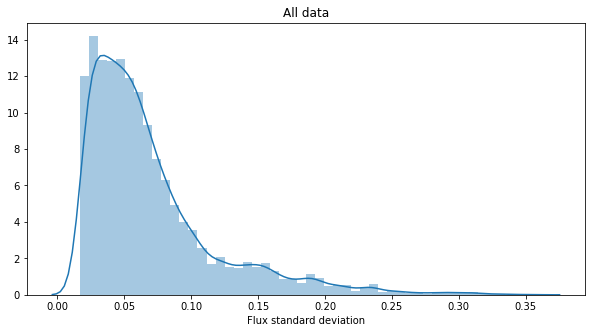

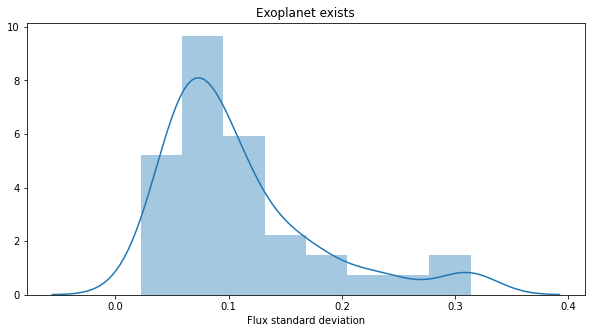

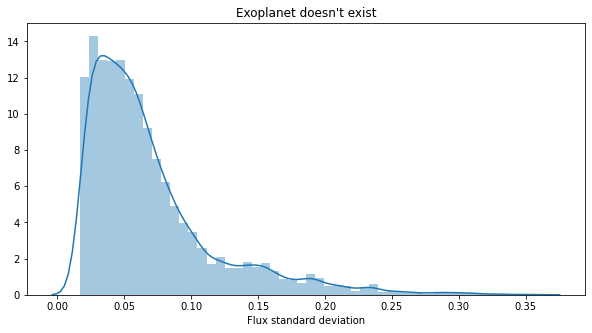

Flux variance


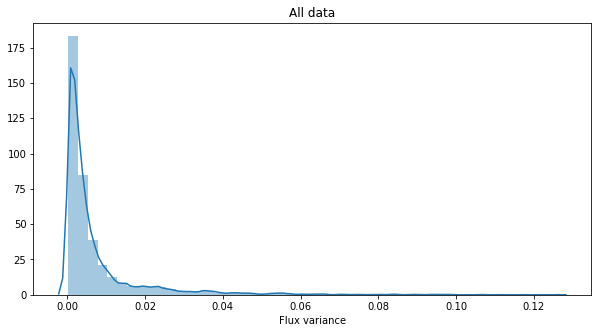

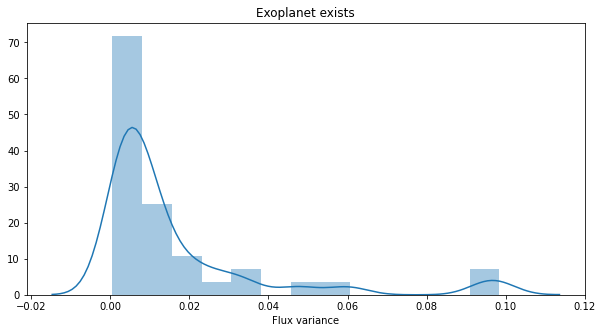

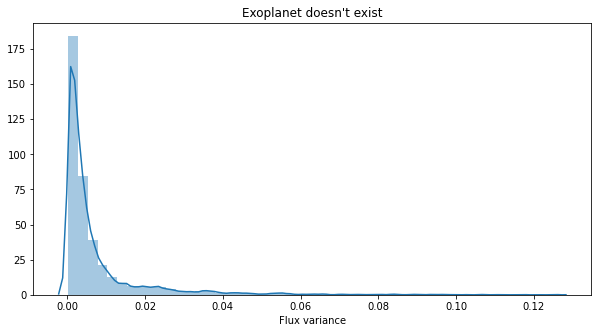

Flux mean


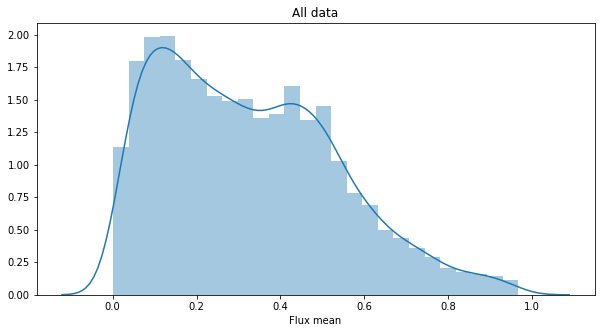

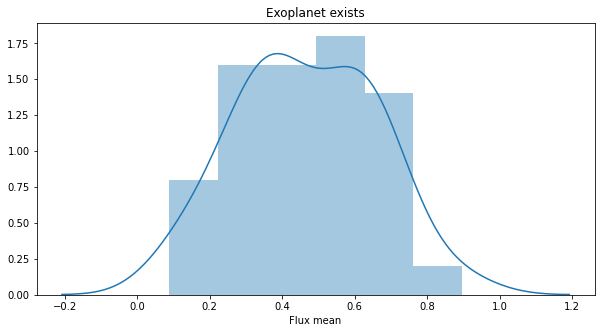

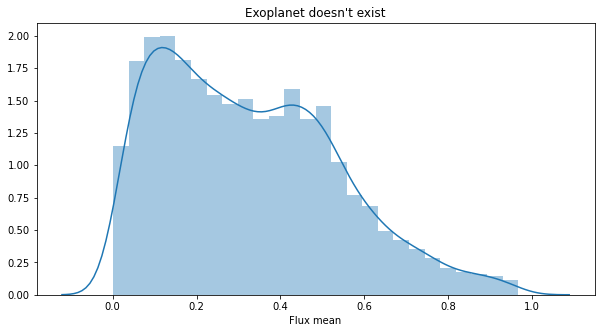

Flux BB Outliers


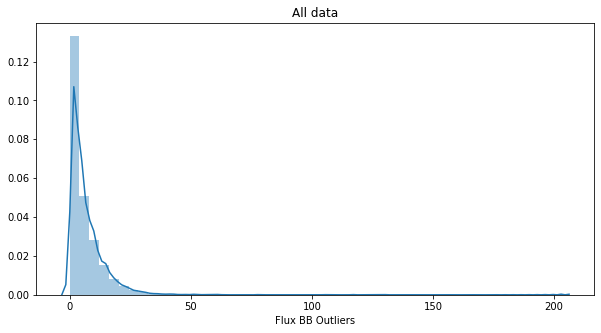

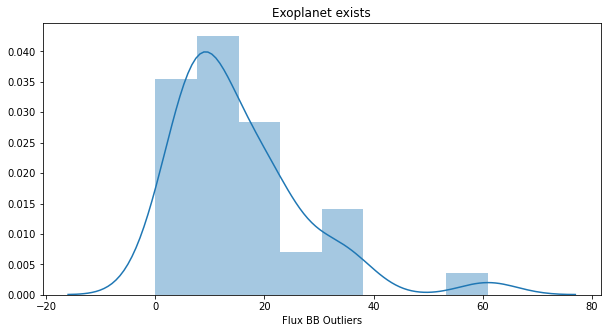

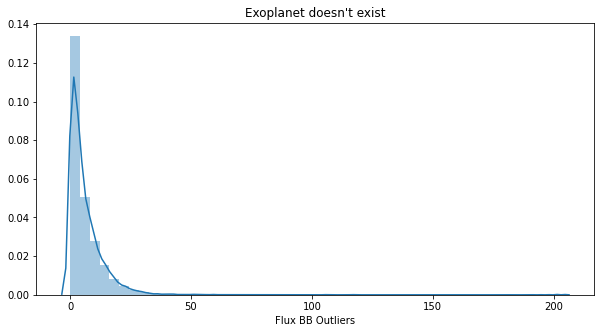

STD of Flux BBand outliers


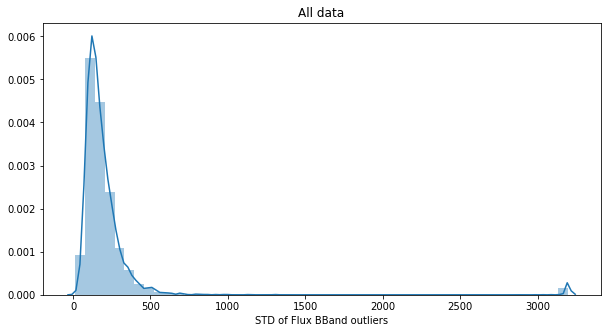

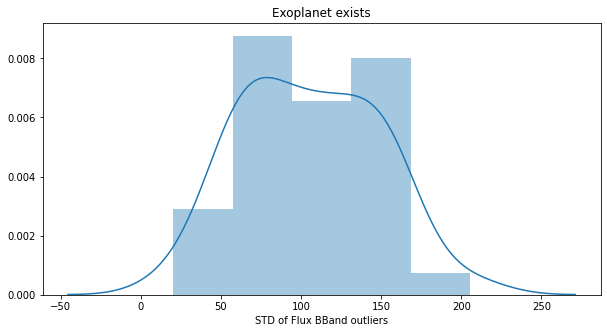

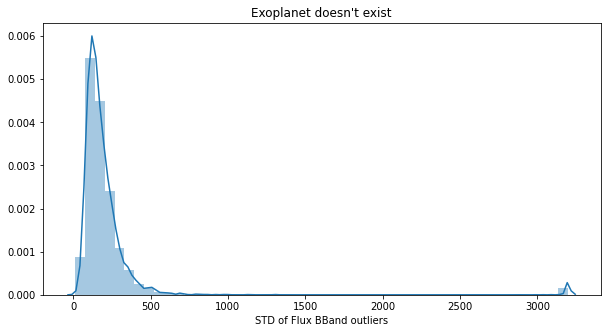

Mean of Flux BBand outliers


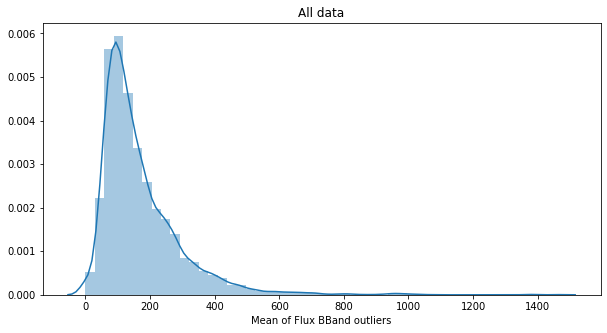

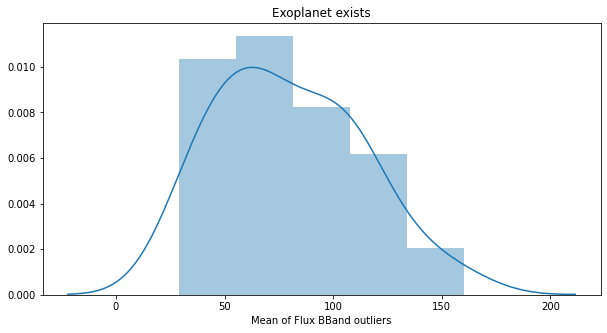

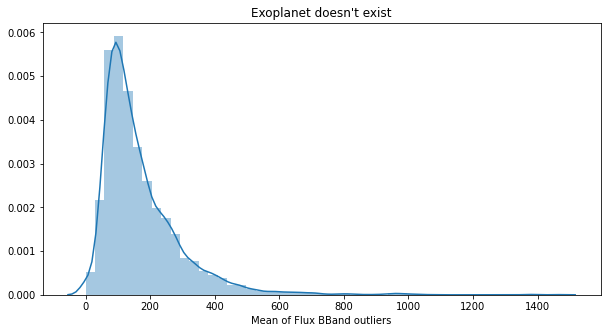

Fourier: STD


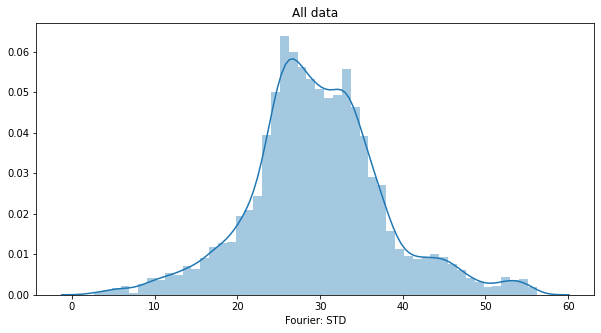

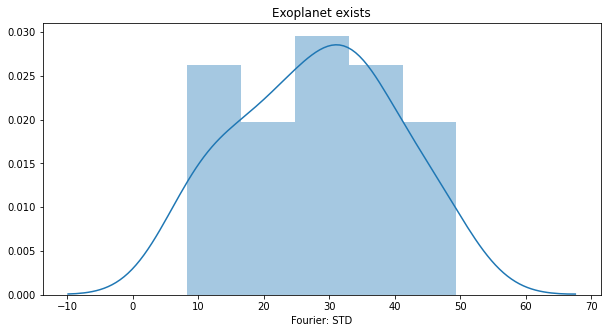

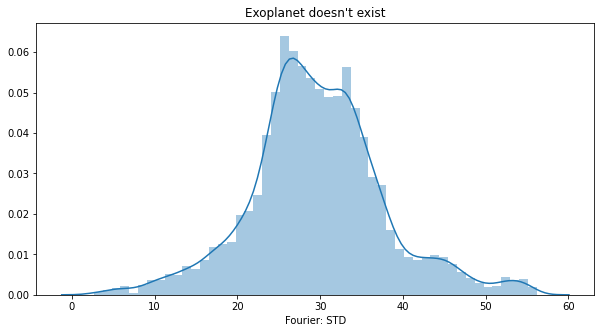

Fourier: Mean


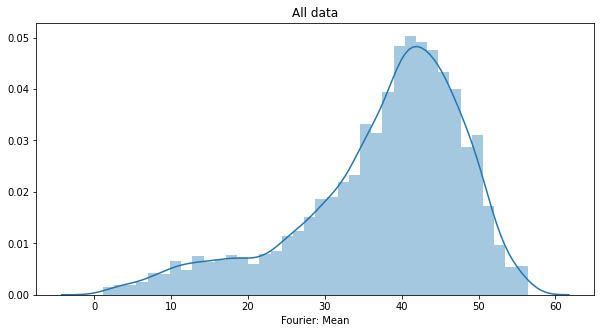

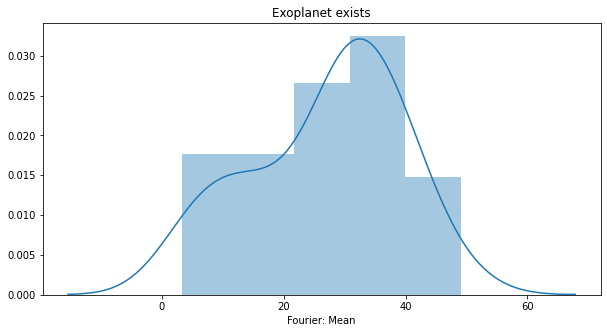

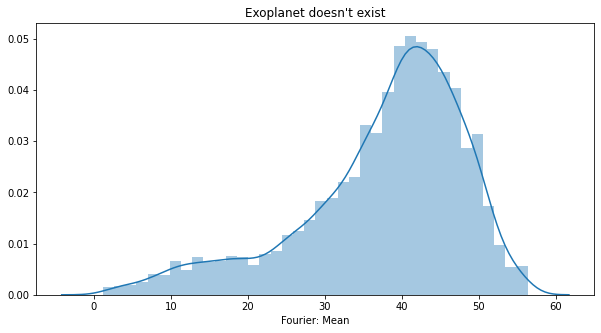

Fourier: BBand outliers


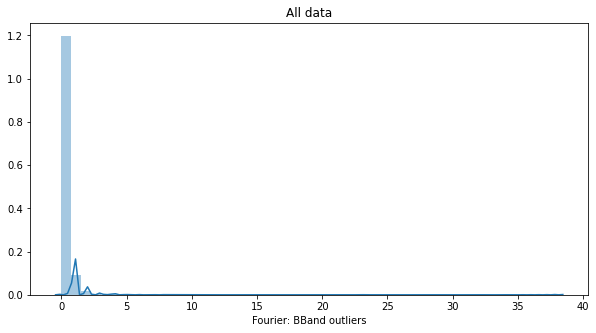

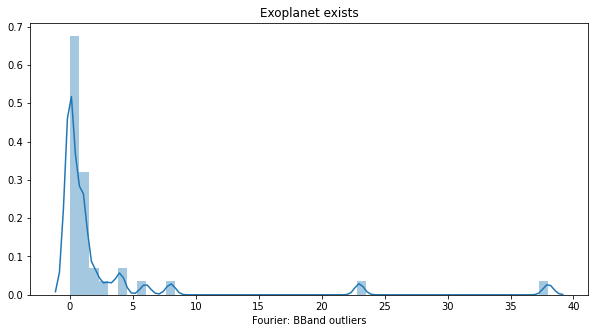

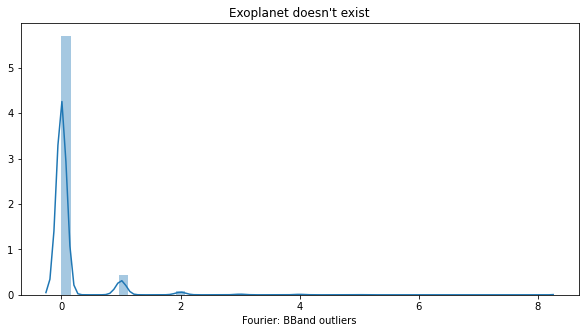

In [22]:
plot_histograms(train_features.features)